In [1]:
import os
import json
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth = 400

In [3]:
annotation_paths = os.path.join(os.getcwd(),"image_captioning_data/annotations/")
caption_train_path = os.path.join(annotation_paths,"captions_train2017.json")
caption_valid_path = os.path.join(annotation_paths,"captions_val2017.json")
image_train_path = os.path.join(os.getcwd(),"image_captioning_data/train2017/")
image_valid_path = os.path.join(os.getcwd(),"image_captioning_data/val2017/")
image_train_path

'/image/rudra/datasets/image_captioning_data/train2017/'

In [4]:
all_captions = []
all_image_paths = []
# Validation Images
with open(caption_valid_path) as f:
    valid_captions = json.load(f)
for _ in valid_captions['annotations']:
    caption = "<start> " + _['caption'] + " <end>"
    image_path = image_valid_path + '%012d.jpg' %(_['image_id'])
    all_captions.append(caption)
    all_image_paths.append(image_path)
print(len(all_captions), len(all_image_paths))

# Training Images
with open(caption_train_path) as f:
    image_captions = json.load(f)
for _ in image_captions['annotations']:
    caption = "<start> " + _['caption'] + " <end>"
    image_path = image_train_path + '%012d.jpg' %(_['image_id'])
    all_captions.append(caption)
    all_image_paths.append(image_path)
print(len(all_captions), len(all_image_paths))

25014 25014
616767 616767


In [5]:
df = pd.DataFrame(list(zip(all_captions,all_image_paths)), columns=['caption', 'image']).drop_duplicates('image')
len(df)

123287

In [ ]:
df = df.apply()

In [8]:
def plot_image_with_caption(df,index):
    plt.figure(figsize=(10,10))
    plt.title(list(df['caption'])[index])
    plt.imshow(np.asarray(Image.open(list(df['image'])[index])))

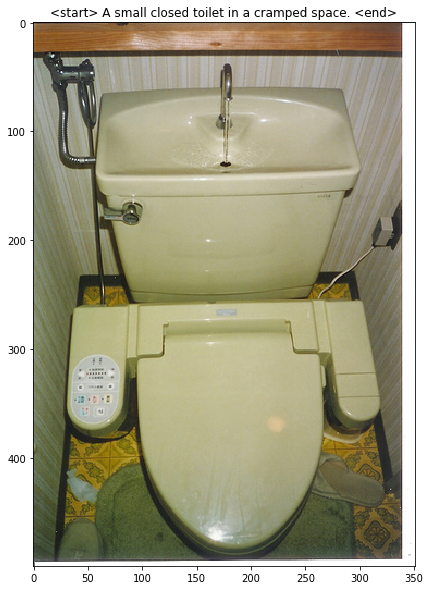

In [7]:
plot_image_with_caption(df,2)

### Finding captions from flickr images

In [8]:
flickr_caption_path = "/image/rudra/datasets/flickr/flickr30k_images/results.csv"
flicker_image_path = "/image/rudra/datasets/flickr/flickr30k_images/flickr30k_images/"

In [10]:
flickr_df = pd.read_csv(flickr_caption_path, sep='|').rename(columns={' comment':'caption', 'image_name':'image'})
flickr_new_df = flickr_df[['caption','image']].drop_duplicates('image')
flickr_new_df['caption'] = flickr_new_df.apply(lambda x: '<start> ' + x['caption'] + ' <end>' , axis=1)
flickr_new_df['image'] = flickr_new_df.apply(lambda x : os.path.join(flicker_image_path,x['image']), axis=1)
len(flickr_new_df)

31783

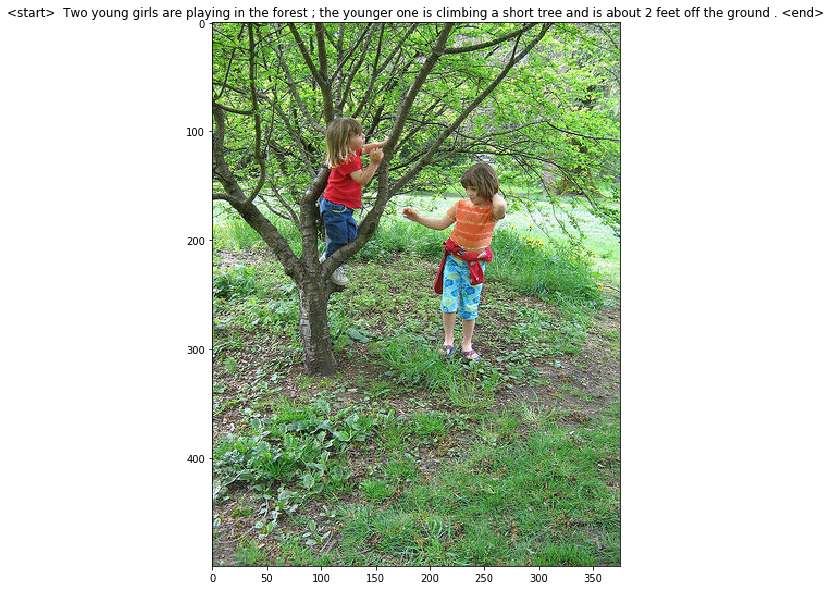

In [12]:
plot_image_with_caption(flickr_new_df, 179)

### finding captions for google_conceptual_Captioning images


In [3]:
image_path = "/image/rudra/datasets/google_conceptual_caption/validation/"
gcc_annot_path = "/image/rudra/datasets/Validation_GCC-1.1.0-Validation.tsv"
x = [os.path.join(image_path,_) for _ in os.listdir(image_path)]
len(x)

17822

In [4]:
x = [os.path.join(image_path,_) for _ in os.listdir(image_path)]
len(x)
correct_path = []
incorrect_path = []
from PIL import Image
for path in x:
    try:
        Image.open(path)
        correct_path.append(path)
    except Exception as e:
        incorrect_path.append(path)
len(correct_path), len(incorrect_path)

(8911, 8911)

In [5]:
# for path in incorrect_path:
#     os.remove(path)

In [6]:
images = [_ for _ in os.listdir(image_path)]
gcc_df = pd.read_csv(gcc_annot_path, sep="\t", header=None).rename(columns={0:'caption',1:'image'})
gcc_df['id'] = gcc_df.index
gcc_df['caption'] = gcc_df.apply(lambda x: '<start> ' + x['caption'] + ' <end>' , axis=1)
gcc_df['image'] = gcc_df.apply(lambda x: str(x['id']) + "_" + x['image'].split('/')[-1] , axis=1)
gcc_df.drop(gcc_df[~gcc_df.image.isin(images)].index, inplace=True)
gcc_df.drop(columns=['id'], inplace=True)
gcc_df['image'] = gcc_df.apply(lambda x: os.path.join(image_path, x['image']) , axis=1)
gcc_df.head()

,caption,image
0,<start> author : a life in photography -- in pictures <end>,/image/rudra/datasets/google_conceptual_caption/validation/0_66016c3ba27c0e04f39e2bd81a934e3e--anita-ekberg-bob-hope.jpg
2,<start> photograph of the sign being repaired by brave person <end>,/image/rudra/datasets/google_conceptual_caption/validation/2_Clearwater-Crossing-Shopping-Center-sign-Indianapolis-Indiana.jpg
3,<start> the player staring intently at a computer screen . <end>,/image/rudra/datasets/google_conceptual_caption/validation/3_9066492-3x2-700x467.jpg
4,<start> globes : the green 3d person carrying in hands globe <end>,/image/rudra/datasets/google_conceptual_caption/validation/4_carrying-globe-stock-image-1115085.jpg
5,<start> the - bedroom stone cottage can sleep people <end>,/image/rudra/datasets/google_conceptual_caption/validation/5_1415187324676_wps_31_Home_is_a_little_Deer_Ivy.jpg


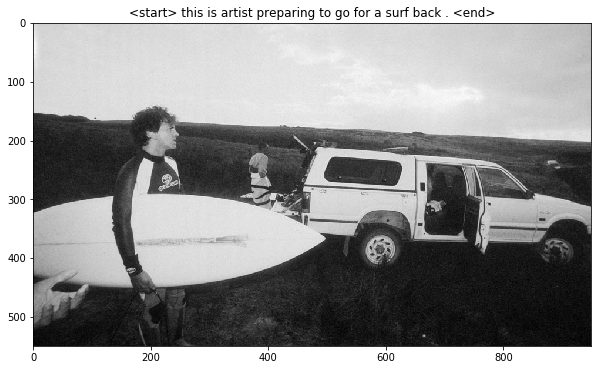

In [10]:
plot_image_with_caption(gcc_df,213)

In [17]:
print(len(df), len(flickr_new_df), len(gcc_df), len(df) + len(flickr_new_df) + len(gcc_df))

123287 31783 8911 163981


In [18]:
final_df = pd.concat([df,flickr_new_df, gcc_df])
final_captions = final_df['caption'].tolist()
final_image_paths = final_df['image'].tolist()
len(final_captions), len(final_image_paths)

(163981, 163981)

In [20]:
final_df.to_csv("all_caption_img_paths.csv", index=False)

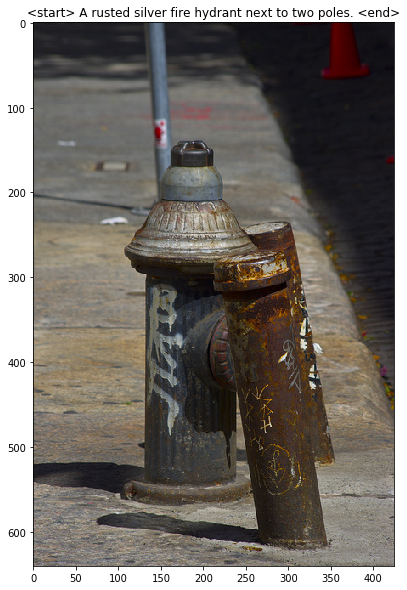

In [52]:
x = [_ for _ in zip(final_captions, final_image_paths)]
index = 1000
plt.figure(figsize=(10,10))
plt.title(x[index][0])
plt.imshow(np.asarray(Image.open(x[index][1])))

## Preprocess image using inceptionV3

In [53]:
from sklearn.utils import shuffle
import tensorflow as tf
from tqdm import tqdm
tf.enable_eager_execution()
train_captions, image_name_vector = shuffle(final_captions, final_image_paths, random_state=2)
len(train_captions), len(image_name_vector)

(163981, 163981)

In [54]:
def load_image(image_path):
    try:
        img = tf.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize_images(img, (299, 299))
        img = tf.keras.applications.inception_v3.preprocess_input(img)
        return img, image_path
    except Exception as e:
        print("inside load image ", image_path)
        return(image_path)
    

In [29]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
image_feature_extract_model = tf.keras.models.Model(image_model.input, image_model.layers[-1].output)
image_feature_extract_model

In [55]:
image_dataset = tf.data.Dataset.from_tensor_slices(image_name_vector).map(load_image).batch(16)
image_dataset

<BatchDataset shapes: ((?, 299, 299, 3), (?,)), types: (tf.float32, tf.string)>

In [56]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
for img, path in tqdm(image_dataset):
    try:
        print("inside ", path)
        batch_features = image_feature_extract_model(img)
        batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
        for bf,p in zip(batch_features, path):
            try:
                path_of_feature = p.numpy().decode('utf-8')
                np.save(path_of_feature,bf.numpy())
            except InvalidArgumentError:
                print("path",p," imagedataset", path_of_feature)
            except Exception as e:
                print("path",p," imagedataset", path_of_feature)
    except InvalidArgumentError:
        print("path",p," imagedataset", path_of_feature)        
    except Exceptions as e:
        print("inside last",path)

In [59]:
def calc_max_len(tensor):
    return max(len(x) for x in tensor)

max_token = 6000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_token, oov_token='<unk>',
                                                 filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)
train_caption_seq = tokenizer.texts_to_sequences(train_captions)

In [61]:
tokenizer.word_index

{'<unk>': 1,
 'a': 2,
 '<start>': 3,
 '<end>': 4,
 'in': 5,
 'of': 6,
 'the': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'man': 12,
 'to': 13,
 'sitting': 14,
 'white': 15,
 'an': 16,
 'two': 17,
 'standing': 18,
 'woman': 19,
 'are': 20,
 'at': 21,
 'people': 22,
 'next': 23,
 'holding': 24,
 'black': 25,
 'wearing': 26,
 'street': 27,
 'top': 28,
 'while': 29,
 'young': 30,
 'table': 31,
 'blue': 32,
 'red': 33,
 'his': 34,
 'down': 35,
 'large': 36,
 'that': 37,
 'person': 38,
 'group': 39,
 'front': 40,
 'shirt': 41,
 'up': 42,
 'dog': 43,
 'it': 44,
 'field': 45,
 'riding': 46,
 'some': 47,
 'green': 48,
 'by': 49,
 'small': 50,
 'walking': 51,
 'water': 52,
 'her': 53,
 'near': 54,
 'other': 55,
 'tennis': 56,
 'boy': 57,
 'men': 58,
 'playing': 59,
 'one': 60,
 'girl': 61,
 'room': 62,
 'train': 63,
 'plate': 64,
 'brown': 65,
 'for': 66,
 'building': 67,
 'baseball': 68,
 'side': 69,
 'looking': 70,
 'cat': 71,
 'has': 72,
 'from': 73,
 'yellow': 74,
 'as': 75,
 'grass': 

In [62]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
train_caption_seq = tokenizer.texts_to_sequences(train_captions)
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_caption_seq, padding='post')
max_length = calc_max_len(train_caption_seq)
max_length

80

In [64]:
from sklearn.model_selection import train_test_split
# Create training and validation sets using an 80-20 split
img_name_train, img_name_val, cap_train, cap_val = train_test_split(image_name_vector,
                                                                    cap_vector,
                                                                    test_size=0.2,
                                                                    random_state=1)
len(img_name_train), len(img_name_val), len(cap_train), len(cap_val)

(131184, 32797, 131184, 32797)

163981